##**<font color="blue">Python Classes**

Jeff Guyon, February 2024

ChatGPT 4.0 used to help with the development



#**<font color="blue">Python Classes - the key to object oriented programming in Python!**




#Object-oriented programming (OOP) offers a powerful way to model complex systems like marine ecosystems by representing various entities, such as sample species and analyses, as objects with specific attributes and behaviors, facilitating more intuitive and organized coding structures for managing and simulating ecological interactions and data analysis in fisheries science.

#**Let's create a simple class for storing data...**

In [1]:
class BioSample:
    def __init__(self, species_name, sample_id, collection_date):
        self.species_name = species_name
        self.sample_id = sample_id
        self.collection_date = collection_date

    def update_species_name(self, new_name):
        self.species_name = new_name

    def update_collection_date(self, new_date):
        self.collection_date = new_date

    def get_sample_info(self):
        return f"Sample ID: {self.sample_id}\nSpecies: {self.species_name}\nCollection Date: {self.collection_date}"

#**Let's make an instance of the class.**

In [2]:
# Creating an instance of BioSample
dolphin_sample = BioSample(species_name="Dolphin", sample_id="D12345", collection_date="2023-05-01")


#**<font color="red">Exercise: Make some more samples...**


In [ ]:

# Creating an instance of BioSample
# dolphin_sample2 = BioSample(species_name="Dolphin", sample_id="D12346", collection_date="2023-06-01")
# Redfish_sample = BioSample(species_name="Redfish", sample_id="D12347", collection_date="2023-06-05")


#**Let's return the information about the dolphin sample!**

In [3]:
# Printing initial sample information
print("Initial Sample Information:")
print(dolphin_sample.get_sample_info())

Initial Sample Information:
Sample ID: D12345
Species: Dolphin
Collection Date: 2023-05-01


#**<font color="red">Exercise: Print out the information about the samples you created...**


In [4]:

# Exercise
# print(dolphin_sample2.get_sample_info())

#**What if we wanted to change information about dolphin sample, what would we do?**

In [5]:
# Updating species name and collection date
dolphin_sample.update_species_name("Atlantic Bottlenose Dolphin")
dolphin_sample.update_collection_date("2023-06-01")

# Printing updated sample information
print("\nUpdated Sample Information:")
print(dolphin_sample.get_sample_info())


Updated Sample Information:
Sample ID: D12345
Species: Atlantic Bottlenose Dolphin
Collection Date: 2023-06-01


#**<font color="red">Exercise: Change the species name and collection date for a sample you made!**

In [6]:

# Answer
# dolphin_sample2.update_species_name("Pilot Whale")
# dolphin_sample2.update_collection_date("2023-08-21")
# print("\nUpdated Sample Information:")
# print(dolphin_sample2.get_sample_info())

# **Let's expand on the use of classes. Here we'll develop a series of classes to store information, analize the data, and visualize the results. First, Let's develop a class for storing MarineSpecies and observation information.**

In [7]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines  # Import the mlines module for custom legend handles
import numpy as np


class MarineSpecies:
    def __init__(self, name, habitat, average_size, conservation_status):
        self.name = name
        self.habitat = habitat
        self.average_size = average_size
        self.conservation_status = conservation_status
        self.observations = []  # A list to store observations of this species

    def add_observation(self, location, date, size, researcher):
        observation = {
            "location": location,
            "date": date,
            "size": size,
            "researcher": researcher
        }
        self.observations.append(observation)

    def simulate_observations(self, num_simulations):
        # Simulate observations based on the species' characteristics
        for _ in range(num_simulations):
            simulated_location = np.random.choice(['Pacific Ocean', 'Atlantic Ocean', 'Gulf of Mexico'])
            simulated_date = f"2024-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}"
            std_dev = self.average_size/10
            simulated_size = np.random.normal(self.average_size, std_dev)
            simulated_researcher = np.random.choice(['John Smith', 'Emily Johnson', 'Sarah Davis', 'Jeff Guyon'])
            self.add_observation(simulated_location, simulated_date, simulated_size, simulated_researcher)

    def display_info(self):
        print(f"Species: {self.name}")
        print(f"Habitat: {self.habitat}")
        print(f"Average Size for Species Reported: {self.average_size}")

        print(f"The number of observations: {len(self.observations)}")

        sizes = [obs['size'] for obs in self.observations]  # Extract the 'size' value from each dictionary
        average_size = np.average(sizes)  # Calculate the average of these sizes
        print(f"Average Size for Observations: {average_size}")

        print(f"Conservation Status: {self.conservation_status}")
        print("Observations:")
        for obs in self.observations:
            print(f" - Location: {obs['location']}, Date: {obs['date']}, Size: {obs['size']}, Researcher: {obs['researcher']}")



#**Second, we'll develop a class for calculating the average size of species, identifying endangered species, and performing an analysis to plot the location of the samples relative to their endangered status.**

In [8]:
class DataAnalysis:
    def __init__(self, marine_species_data):
        self.marine_species_data = marine_species_data

    def calculate_average_size(self):
        return np.average([obs['size'] for species in self.marine_species_data for obs in species.observations])  # Calculate the average of these sizes

    def find_endangered_species(self):
        endangered_species = [species for species in self.marine_species_data if species.conservation_status == "Endangered"]
        return endangered_species

    def show_distribution(self, PrintFile):
        location_data = {}
        possible_statuses = ["Endangered", "Vulnerable", "Least Concern"]
        status_colors = {"Endangered": "red", "Vulnerable": "orange", "Least Concern": "green"}

        for species in self.marine_species_data:
            for observation in species.observations:
                location = observation['location']
                conservation_status = species.conservation_status

                if location not in location_data:
                    location_data[location] = {status: 0 for status in possible_statuses}
                location_data[location][conservation_status] += 1

        # Preparing the plot
        plt.figure(figsize=(10, 6))

        # Plot each location with size and color coded by conservation status
        for location, statuses in location_data.items():
            for status, count in statuses.items():
                if count > 0:
                    plt.scatter(location, status, s=count*50, color=status_colors[status], alpha=0.6, edgecolors='w', label=status)

        # Create custom legend handles
        legend_handles = [mlines.Line2D([], [], color=status_colors[status], marker='o', linestyle='None',
                                        markersize=10, label=status) for status in possible_statuses]

        # Add the custom legend to the plot
        plt.legend(handles=legend_handles, title="Conservation Status")

        plt.xlabel('Location')
        plt.ylabel('Conservation Status')
        plt.title('Marine Species Distribution Map by Location and Conservation Status')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(PrintFile)
        plt.show()

#**Finally, we'll develop a class to later perform a visual analysis of the data.**

In [9]:
class DataVisualization:
    def __init__(self, data):
        self.data = data

    def create_histogram_simple(self, attribute):

        # Collect values from the observations of each MarineSpecies object
        values = []
        for item in self.data:
            for obs in item.observations:
                if attribute in obs:  # Check if the attribute exists in the observation
                    values.append(obs[attribute])

        # Preparing the plot
        plt.figure(figsize=(10, 6))

        plt.hist(values, bins=20, alpha=0.7)
        plt.xlabel(attribute.capitalize())
        plt.ylabel("Frequency")
        plt.title(f"Histogram of All Species {attribute.capitalize()} with Simulated Data")
        plt.savefig('Histogram.png')
        plt.show()  # Display the plot

    def create_histogram_detailed(self, attribute):
        # Define colors for each species
        colors = plt.cm.viridis(np.linspace(0, 1, len(self.data)))
        # Initialize a figure
        plt.figure(figsize=(10, 6))

        # Loop through each MarineSpecies object to plot its histogram
        for i, item in enumerate(self.data):
            # Collect values for the specified attribute from observations
            values = [obs[attribute] for obs in item.observations if attribute in obs]

            # Plot histogram for the current species
            plt.hist(values, bins=20, alpha=0.7, color=colors[i], label=item.name)

        # Add labels, title, and legend
        plt.xlabel(attribute.capitalize())
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {attribute.capitalize()} for Each Species with Simulated Data")
        plt.legend(title="Species")

        # Show and save the plot
        plt.tight_layout()  # Adjust layout
        plt.savefig('Histogram_by_Species.png')
        plt.show()

    def create_scatter_plot(self, x_attribute, y_attribute):
        x_values, y_values, categories = [], [], []
        for item in self.data:
            category = getattr(item, 'conservation_status', 'Unknown')  # Example for color coding
            for obs in item.observations:
                if hasattr(item, x_attribute) and y_attribute in obs:
                    x_values.append(getattr(item, x_attribute))
                    y_values.append(obs[y_attribute])
                    categories.append(category)  # Append category for color coding

        # Convert categories to numeric values for color coding
        unique_categories = list(set(categories))
        color_map = {category: i for i, category in enumerate(unique_categories)}
        colors = [color_map[category] for category in categories]

        # Create scatter plot with color coding and size variation
        plt.figure(figsize=(10, 6))
        plt.scatter(x_values, y_values, c=colors, alpha=0.5, cmap='viridis', s=np.random.randint(20, 200, size=len(x_values)))
        plt.xlabel(x_attribute.capitalize())
        plt.ylabel(y_attribute.capitalize())
        plt.title(f"Scatter Plot: {x_attribute.capitalize()} vs. {y_attribute.capitalize()} with Simulated Data")
        plt.grid(True)
        plt.colorbar(ticks=range(len(unique_categories)), label='Conservation Status')
        plt.clim(-0.5, len(unique_categories)-0.5)
        # plt.xticks(ticks=range(len(unique_categories)), labels=unique_categories, rotation='vertical')
        plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label=cat) for cat in unique_categories], title="Conservation Status")
        plt.savefig('ScatterPlot.png')
        plt.show()


    def create_whisker_plot_grouped_by_species(self, PrintFile, exclude_species=None):
        if exclude_species is None:
            exclude_species = []  # List of species names to exclude

        habitat_species_sizes = {}
        species_colors = {}
        color_map = {'Endangered': 'red', 'Vulnerable': 'orange', 'Least Concern': 'green'}

        for species in self.data:
            if species.name in exclude_species:
                continue  # Skip the species if it's in the exclude list

            habitat = species.habitat
            species_name = species.name
            conservation_status = species.conservation_status
            if habitat not in habitat_species_sizes:
                habitat_species_sizes[habitat] = {}
            habitat_species_sizes[habitat][species_name] = [obs['size'] for obs in species.observations]
            species_colors[species_name] = color_map.get(conservation_status, 'gray')

        fig, ax = plt.subplots(figsize=(10, 6))
        positions = []
        labels = []
        current_position = 1

        for habitat, species_sizes in habitat_species_sizes.items():
            for species_name, sizes in species_sizes.items():
                bp = ax.boxplot(sizes, positions=[current_position], patch_artist=True, widths=0.6)
                for box in bp['boxes']:
                    box.set_facecolor(species_colors[species_name])
                labels.append(f"{habitat}\n{species_name}")
                positions.append(current_position)
                current_position += 1
            current_position += 1  # Add a gap between habitats

        # Set custom x-axis labels
        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45, ha='right')

        # Add custom legend for conservation status
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color, label=status) for status, color in color_map.items()]
        ax.legend(handles=legend_elements, title="Conservation Status")

        ax.set_ylabel('Size')
        ax.set_title('Species Sizes Grouped by Habitat and Color Coded by Conservation Status')

        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
        plt.savefig(PrintFile)
        plt.show()


#**We'll start by creating instances of the MarineSpecies class**

In [10]:
Blue_Whale = MarineSpecies("Blue Whale", "Ocean", 20.0, "Endangered")
Loggerhead_Turtle = MarineSpecies("Loggerhead Sea Turtle", "Coastal", 1.5, "Vulnerable")

# **<font color="red">Exercise:  Make an instance for a new species, we'll call Kemps_Ridley_Turtle.  The turtle lives in a coastal habitat, average size of 0.55 meters, and is listed as "Vulnerable"**

In [16]:

# Answer
# Kemps_Ridley_Turtle = MarineSpecies("Kemps Ridley Sea Turtle", "Coastal", 0.55, "Vulnerable")

#**We'll create observations for the 2 initial tracked species (Blue_Whale and Loggerhead_Turtle)**

In [11]:
# Add observations for species1
Blue_Whale.add_observation("Pacific Ocean", "2023-01-10",20.1, "John Smith")
Blue_Whale.add_observation("Atlantic Ocean", "2023-02-15", 16.4, "Emily Johnson")

# Add observations for species2
Loggerhead_Turtle.add_observation("Gulf of Mexico", "2023-03-20", 1.74, "Sarah Davis")

#**<font color="red">Exercise: Create an observation for the Kemps_Ridley_Turtle...***

In [17]:

# Answer
# Kemps_Ridley_Turtle.add_observation("Gulf of Mexico", "2023-03-20", 0.62, "Maurice Wilkens")

#**Let's display information about the Blue_Whale and Loggerhead_Turtle species and their observations**

In [12]:
Blue_Whale.display_info()
print("\n")
Loggerhead_Turtle.display_info()

Species: Blue Whale
Habitat: Ocean
Average Size for Species Reported: 20.0
The number of observations: 2
Average Size for Observations: 18.25
Conservation Status: Endangered
Observations:
 - Location: Pacific Ocean, Date: 2023-01-10, Size: 20.1, Researcher: John Smith
 - Location: Atlantic Ocean, Date: 2023-02-15, Size: 16.4, Researcher: Emily Johnson


Species: Loggerhead Sea Turtle
Habitat: Coastal
Average Size for Species Reported: 1.5
The number of observations: 1
Average Size for Observations: 1.74
Conservation Status: Vulnerable
Observations:
 - Location: Gulf of Mexico, Date: 2023-03-20, Size: 1.74, Researcher: Sarah Davis


#**<font color="red">Exercise: Print the information about the Kemps_Ridley_Turtle**

In [18]:

# Answer
# Kemps_Ridley_Turtle.display_info()

Species: Kemps Ridley Sea Turtle
Habitat: Coastal
Average Size for Species Reported: 0.55
The number of observations: 1
Average Size for Observations: 0.62
Conservation Status: Vulnerable
Observations:
 - Location: Gulf of Mexico, Date: 2023-03-20, Size: 0.62, Researcher: Maurice Wilkens


#**Let's create instances for 2 more species and add observations**

In [13]:
# Example usage - Create 2 more instances of the MarineSpecies class
Humpback_Whale = MarineSpecies("Humpback Whale", "Ocean",15.00, "Endangered")
Bottlenose_Dolphin = MarineSpecies("Bottlenose Dolphin", "Coastal", 2.04, "Least Concern")

# Add observations for species4
Humpback_Whale.add_observation("Atlantic Ocean", "2023-02-10", 14.25, "Jeff Guyon")
Humpback_Whale.add_observation("Atlantic Ocean", "2023-03-15", 10.42, "Jim Watson")
Humpback_Whale.add_observation("Atlantic Ocean", "2023-04-15", 13.25, "Francis Crick")
Humpback_Whale.add_observation("Atlantic Ocean", "2023-05-15", 15.32, "Rosalind Franklin")

# Add observations for species5
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-21", 1.73, "Wayne McFee")
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-22", 1.96, "Bonnie Ertel")
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-23", 2.03, "Colin Perkins-Taylor")
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-24", 1.32, "Nicole Principe")
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-25", 0.87, "Erik NMMF")
Bottlenose_Dolphin.add_observation("Gulf of Mexico", "2023-03-26", 1.70, "Jeff Guyon")

#**We can take a look at the data...**



Average Size of all species: 7.265 meters



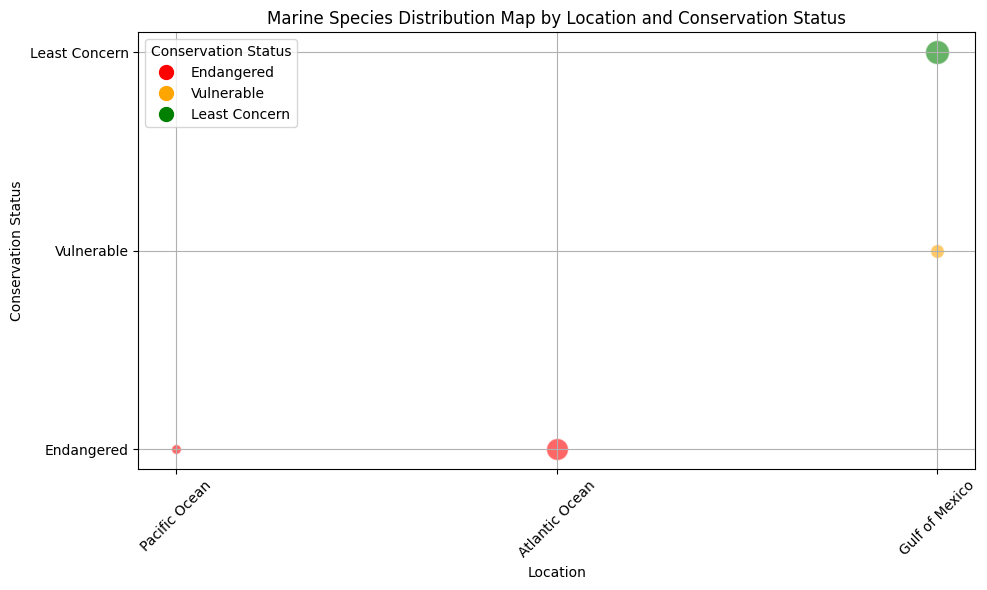

In [19]:
# Create a list of marine species data
marine_species_data = [Blue_Whale, Loggerhead_Turtle, Humpback_Whale, Kemps_Ridley_Turtle, Bottlenose_Dolphin]

# Create an instance of the DataAnalysis class
analysis = DataAnalysis(marine_species_data)

# Calculate and print the average size of species
average_size = analysis.calculate_average_size()
print(f"\n\nAverage Size of all species: {average_size} meters\n")

# Plot a distribution map with more samples
analysis.show_distribution("Distribution-LimitedSamples.png")

#**<font color="red">Exercise: Using the script above, calculate and print the average size of the 6 Bottlenose_Dolphin observations**

In [ ]:

# Answer
# marine_species_data = [Bottlenose_Dolphin]
# analysis = DataAnalysis(marine_species_data)
# average_size = analysis.calculate_average_size()
# print(f"\n\nAverage Size of all species: {average_size} meters\n")



Average Size of all species: 1.6016666666666666 meters



#**Let's create a lot of observations through simulation...**

In [20]:
# Reset the variables
marine_species_data = [Blue_Whale, Loggerhead_Turtle, Humpback_Whale, Kemps_Ridley_Turtle, Bottlenose_Dolphin]
analysis = DataAnalysis(marine_species_data)

# Create observations through simulation
for species in marine_species_data:
    species.simulate_observations(np.random.randint(50, 101))  # Simulate between 50 and 100 observations per species


#**We can print summaries for all the species now that new samples have been added**

In [21]:
for species in marine_species_data:
    species.display_info()
    print('\n\n')

Species: Blue Whale
Habitat: Ocean
Average Size for Species Reported: 20.0
The number of observations: 72
Average Size for Observations: 19.225397452741827
Conservation Status: Endangered
Observations:
 - Location: Pacific Ocean, Date: 2023-01-10, Size: 20.1, Researcher: John Smith
 - Location: Atlantic Ocean, Date: 2023-02-15, Size: 16.4, Researcher: Emily Johnson
 - Location: Gulf of Mexico, Date: 2024-04-28, Size: 18.445301680667683, Researcher: Sarah Davis
 - Location: Pacific Ocean, Date: 2024-12-03, Size: 17.339957999400944, Researcher: Emily Johnson
 - Location: Atlantic Ocean, Date: 2024-06-06, Size: 16.453555596576525, Researcher: Sarah Davis
 - Location: Gulf of Mexico, Date: 2024-04-13, Size: 17.646652058380475, Researcher: Emily Johnson
 - Location: Gulf of Mexico, Date: 2024-10-09, Size: 18.11570266870669, Researcher: Jeff Guyon
 - Location: Gulf of Mexico, Date: 2024-08-28, Size: 22.675835490362292, Researcher: Sarah Davis
 - Location: Gulf of Mexico, Date: 2024-04-01, Si

#**<font color="red">Exercise: Let's display all the summary for Kemps_Ridley_Turtles**

In [22]:
# Answer
Kemps_Ridley_Turtle.display_info()

Species: Kemps Ridley Sea Turtle
Habitat: Coastal
Average Size for Species Reported: 0.55
The number of observations: 88
Average Size for Observations: 0.5518265556955445
Conservation Status: Vulnerable
Observations:
 - Location: Gulf of Mexico, Date: 2023-03-20, Size: 0.62, Researcher: Maurice Wilkens
 - Location: Pacific Ocean, Date: 2024-02-13, Size: 0.6034862876681113, Researcher: Jeff Guyon
 - Location: Atlantic Ocean, Date: 2024-01-07, Size: 0.5683840462594928, Researcher: John Smith
 - Location: Gulf of Mexico, Date: 2024-07-06, Size: 0.5324029877601627, Researcher: Emily Johnson
 - Location: Atlantic Ocean, Date: 2024-11-12, Size: 0.5864306943118079, Researcher: Jeff Guyon
 - Location: Pacific Ocean, Date: 2024-08-28, Size: 0.5485749300541178, Researcher: Emily Johnson
 - Location: Gulf of Mexico, Date: 2024-04-03, Size: 0.6605190466035344, Researcher: Sarah Davis
 - Location: Atlantic Ocean, Date: 2024-02-17, Size: 0.6236836381967632, Researcher: John Smith
 - Location: Gulf o

#**Create an instance of the DataAnalysis class and print the average size of all species**



In [23]:
# Create an instance of the DataAnalysis class
analysis = DataAnalysis(marine_species_data)

# Calculate and print the average size of species
average_size = analysis.calculate_average_size()
print(f"\n\nAverage Size of all species: {average_size} meters\n")




Average Size of all species: 7.478185736946951 meters



#**Find and print endangered species**

In [24]:
endangered_species = analysis.find_endangered_species()
print("Endangered Species:")
for species in endangered_species:
    print(f" - {species.name}")
print('\n\n')

Endangered Species:
 - Blue Whale
 - Humpback Whale





# **Plot the sample distributions with more samples**

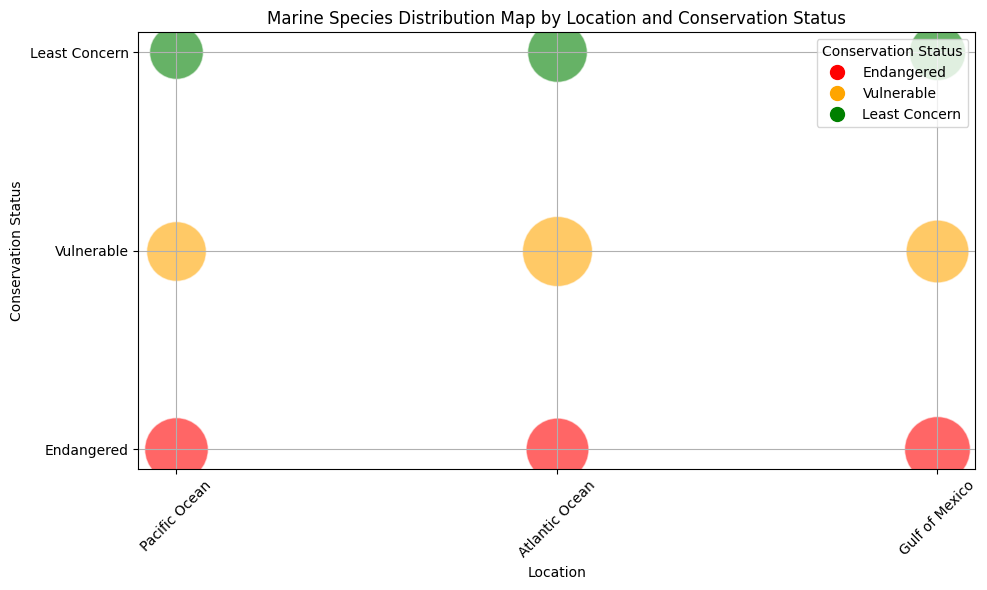

In [ ]:
analysis.show_distribution("Distribution-ManySamples.png")


#**Create an instance of the DataVisualization class and invoke the create_histogram_simple procedure to see what the size distributions look like...**

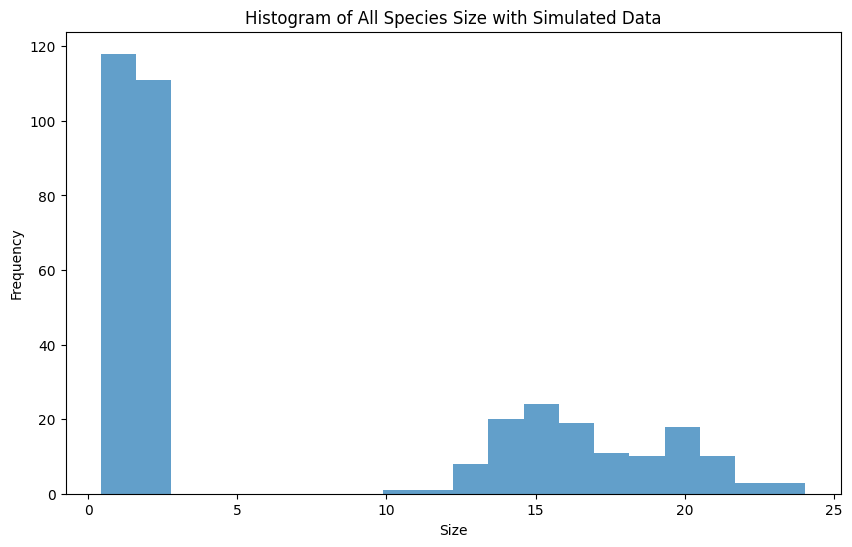

In [ ]:
# Create an instance of the DataVisualization class
visualization = DataVisualization(marine_species_data)

# Create a simple histogram of species sizes
visualization.create_histogram_simple("size")

# **Create a more detailed histogram of species sizes**

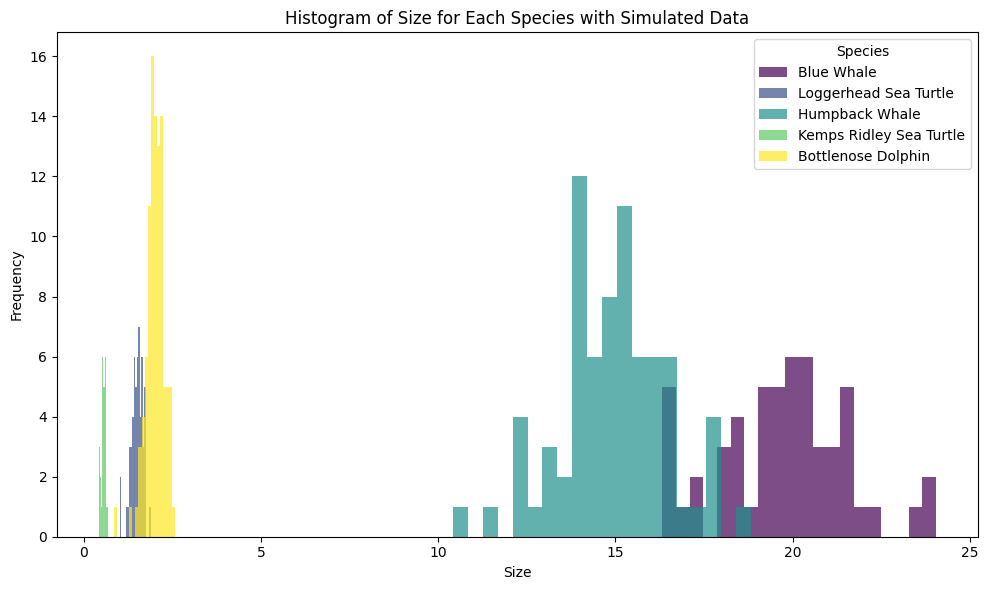

In [ ]:
visualization.create_histogram_detailed("size")

# **Whisker plot showing the habitat and size distribution for all species**

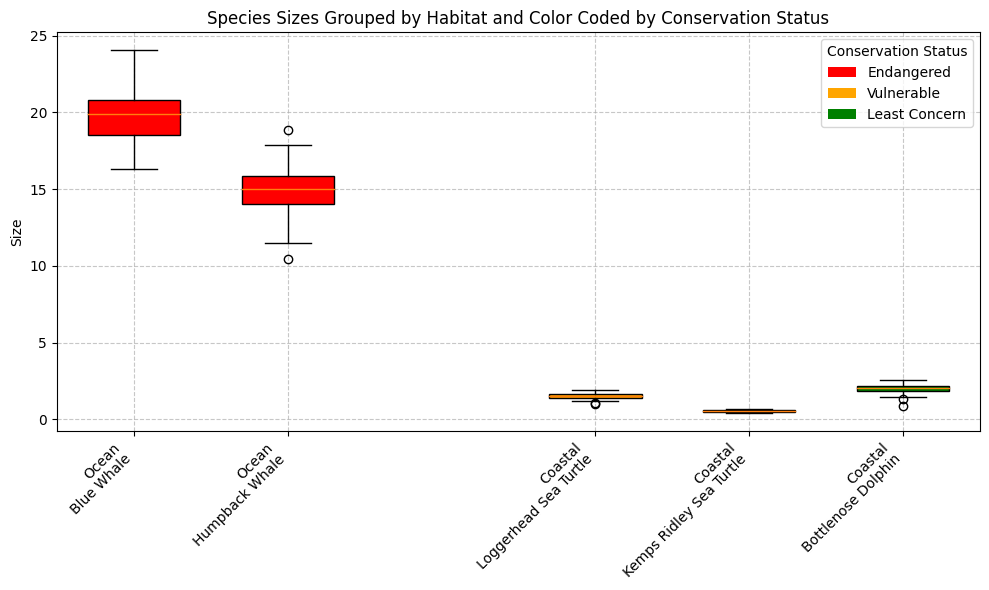

In [ ]:
visualization.create_whisker_plot_grouped_by_species("WhiskerPlot-AllSpecies.png")

# **Create a whisker plot for just the smaller species to better compare...**

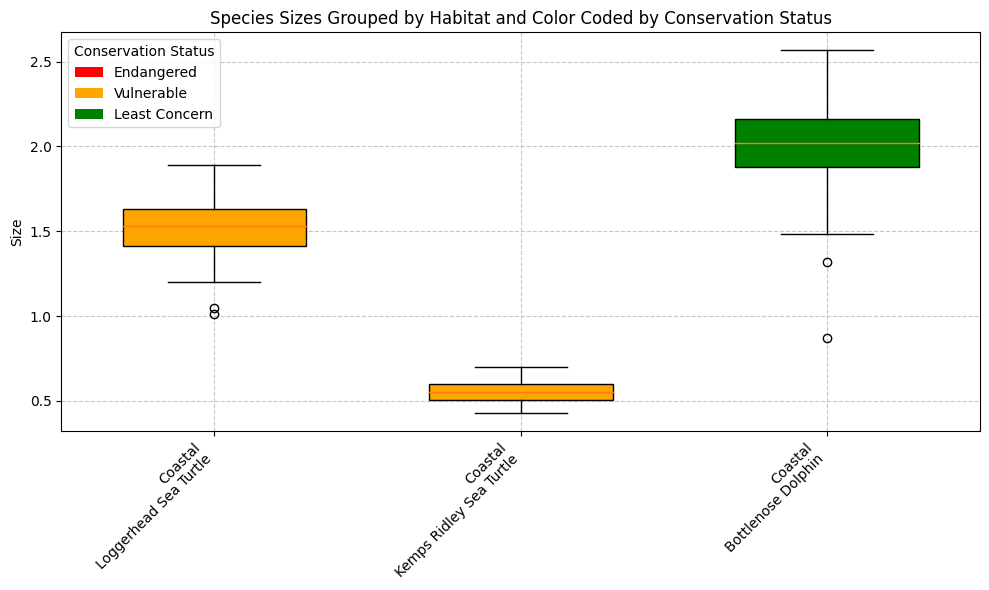

In [ ]:
visualization.create_whisker_plot_grouped_by_species("WhiskerPlot-NoWhales.png", '["Blue Whale", "Humpback Whale"]')

#**Done!**